In [1]:
from tensorflow import keras

In [2]:
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [5]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.rc('figure',autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large', titleweight = 'bold', titlesize = 18, titlepad=10)

In [6]:
import pandas as pd

red_wine = pd.read_csv('red_wine.csv')

In [7]:
red_wine.drop(columns={'Unnamed: 0'}, inplace=True)

In [8]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
red_wine.shape

(1599, 12)

In [10]:
input_shape = [11]

In [11]:
w, b = model.weights

In [12]:
print("Weights\n{}\n\nBias\n{}".format(w,b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.03711385],
       [-0.3872083 ],
       [ 0.6740207 ],
       [ 0.3217258 ],
       [-0.24375021],
       [-0.14645827],
       [-0.21888155],
       [ 0.68622166],
       [ 0.17295516],
       [-0.6146152 ],
       [ 0.3256461 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [13]:
model = keras.Sequential([
    # the hiddem ReLU layers
    layers.Dense(units=4,activation='relu',input_shape=[2]),
    # the hidden second ReLU layers
    layers.Dense(units=3,activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

In [14]:
concrete = pd.read_csv('concrete.csv', index_col=None)

In [15]:
concrete.drop(columns={'Unnamed: 0'}, inplace=True)

In [16]:
len(concrete.columns)

9

In [17]:
input_shape = [8]

In [18]:
model = keras.Sequential([
    # The first hidden layer
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    # The second hidden layer
    layers.Dense(units=512,activation='relu'),
    # The third hidden layer
    layers.Dense(units=512,activation='relu'),
    # The final output layer
    layers.Dense(units=1),
])

In [19]:
df_train = red_wine.sample(frac=0.7, random_state=420)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
792,7.1,0.610,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,6
910,9.3,0.380,0.48,3.8,0.132,3.0,11.0,0.99577,3.23,0.57,13.2,6
561,9.0,0.440,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
302,8.3,0.705,0.12,2.6,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5


In [20]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [21]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)

y_train = df_train['quality']
y_valid = df_valid['quality']

In [22]:
model = keras.Sequential([
    # The first hidden layer
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    # The second hidden layer
    layers.Dense(units=512,activation='relu'),
    # The third hidden layer
    layers.Dense(units=512,activation='relu'),
    # The final output layer
    layers.Dense(units=1),
])

In [23]:
model.compile(optimizer='adam',loss='mae',)

In [24]:
history = model.fit( X_train, y_train,
                   validation_data=(X_valid,y_valid),
                   batch_size=256,
                   epochs=10,)

Train on 1119 samples, validate on 480 samples
Epoch 1/10
1119/1119 [==============================] - 0s 332us/sample - loss: 0.2827 - val_loss: 0.1326
Epoch 2/10
1119/1119 [==============================] - 0s 41us/sample - loss: 0.1482 - val_loss: 0.1225
Epoch 3/10
1119/1119 [==============================] - 0s 45us/sample - loss: 0.1274 - val_loss: 0.1136
Epoch 4/10
1119/1119 [==============================] - 0s 44us/sample - loss: 0.1191 - val_loss: 0.1140
Epoch 5/10
1119/1119 [==============================] - 0s 45us/sample - loss: 0.1104 - val_loss: 0.1159
Epoch 6/10
1119/1119 [==============================] - 0s 46us/sample - loss: 0.1122 - val_loss: 0.1148
Epoch 7/10
1119/1119 [==============================] - 0s 40us/sample - loss: 0.1079 - val_loss: 0.1082
Epoch 8/10
1119/1119 [==============================] - 0s 45us/sample - loss: 0.1074 - val_loss: 0.1036
Epoch 9/10
1119/1119 [==============================] - 0s 43us/sample - loss: 0.1032 - val_loss: 0.1005
Epoch 1

In [25]:
history_df = pd.DataFrame(history.history)

In [26]:
import seaborn as sns

# Let's try for concrete dataset as well

In [27]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
input_shape = concrete.shape[1] - 1
type(input_shape)

int

In [29]:
model = keras.Sequential([
    # First hidden layer
    layers.Dense(units=512, activation='relu', input_shape = [8]),
    # The second hidden layer
    layers.Dense(units=512, activation='relu'),
    # The third hidden layer
    layers.Dense(units=512, activation='relu'),
    # Final output layers
    layers.Dense(units=1),
])

In [30]:
df_train = concrete.sample(frac=0.7,random_state=420)
df_valid = concrete.drop(df_train.index)

In [31]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) /(max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [32]:

X_train = df_train.drop('CompressiveStrength',axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)

y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

In [37]:
model.compile(optimizer='adam', loss='mae')

In [7]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [143]:
fuel = pd.read_csv('fuel.csv')

fuel.drop(columns={'Unnamed: 0'}, inplace=True)

fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [144]:
preprocessor = make_column_transformer(
                                    (StandardScaler(),make_column_selector(dtype_include=np.number)),
                                    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
)

In [145]:
X = fuel.copy()

In [147]:
X = preprocessor.fit_transform(fuel)

X = pd.DataFrame(X)

In [154]:
train = X.sample(frac=0.7, random_state=121)
valid = X.drop(df_train.index)

In [155]:
X_train = train.drop('FE',axis=0)
y_train = train['FE']

X_valid = valid.drop('FE',axis=0)
y_valid = valid['FE']

KeyError: "['FE'] not found in axis"

In [131]:
#df_train = fuel.sample(frac=0.7, random_state=121)
#df_valid = fuel.drop(df_train.index)

In [132]:
#X_train = df_train.drop('FE',axis=1)
#X_valid = df_valid.drop('FE',axis=1)

#y_train = df_train['FE']
#y_valid = df_valid['FE']


In [133]:
preprocessor = make_column_transformer(
                                    (StandardScaler(),make_column_selector(dtype_include=np.number)),
                                    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
)

In [134]:
df_train = preprocessor.fit_transform(df_train)

y_train = np.log(y_train)

In [135]:
df_valid = preprocessor.fit_transform(df_valid)

y_valid = np.log(y_valid)

In [137]:
pd.DataFrame(df_train[10:,:]).shape

(765, 51)

In [138]:
pd.DataFrame(df_valid[10:,:]).shape

(322, 49)

In [121]:
model = keras.Sequential([
            # First layer
            layers.Dense(units=128, activation='relu', input_shape=[51]),
            # Second Layer
            layers.Dense(units=128, activation='relu'),
            # Final layer
            layers.Dense(units=1),
])



In [122]:
model.compile(
            optimizer='adam',
            loss='mae',
)

In [130]:
history = model.fit(
                df_train,y_train,
                validation_data=(df_valid,y_valid),
                batch_size=100,
                epochs=50,
)

Epoch 1/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0115

ValueError: in user code:

    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 51 but received input with shape [None, 49]


In [129]:
result = model.evaluate(df_valid,y_valid,batch_size=100)

ValueError: in user code:

    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 51 but received input with shape [None, 49]


In [27]:
X = fuel.copy()

y = X.pop('FE')

In [28]:
preprocessor = make_column_transformer(
                                (StandardScaler(),make_column_selector(dtype_include=np.number)),
                                (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),

)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
y = np.log(y)

In [33]:
input_shape = [X.shape[1]]

In [36]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [40]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # The first layer
    layers.Dense(units=128, activation='relu', input_shape=input_shape),
    # The second layer
    layers.Dense(units=128, activation='relu'),
    # The third layer
    layers.Dense(units=64,activation='relu'),
    # The final layer
    layers.Dense(1),
])

In [41]:
model.compile(optimizer='adam',loss='mae')

In [54]:
history_df = pd.DataFrame(history.history)

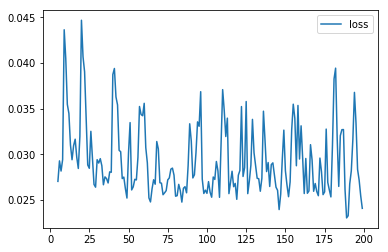

In [55]:
history_df.loc[5:,['loss']].plot();

In [63]:
model.add_update

'float32'

In [1]:
import pandas as pd
from IPython.display import display

In [38]:
red_wine = pd.read_csv('red_wine.csv')

In [39]:
red_wine.drop(columns={'Unnamed: 0'}, inplace=True)

In [40]:
df_train = red_wine.sample(frac=0.7, random_state=121)
df_valid = red_wine.drop(df_train.index)

In [41]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

In [42]:
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [43]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)

y_train = df_train['quality']
y_valid = df_valid['quality']

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [45]:
early_stopping = callbacks.EarlyStopping(
                    min_delta=0.001,
                    patience=20,
                    restore_best_weights=True,

)

In [46]:
model = keras.Sequential([
    # The first layer
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    # The second layer
    layers.Dense(units=512, activation='relu'),
    # The third layer
    layers.Dense(units=512, activation='relu'),
    # The final layer
    layers.Dense(units=1),   
    
])

In [47]:
model.compile(
    optimizer='adam',
    loss='mae',

)

In [48]:
history = model.fit(
            X_train,y_train,
            validation_data=(X_valid,y_valid),
            batch_size=256,
            epochs=500,
            callbacks=[early_stopping],
            verbose=0,
)

In [49]:
history_df = pd.DataFrame(history.history)

Minimum validation loss : 0.09111347049474716


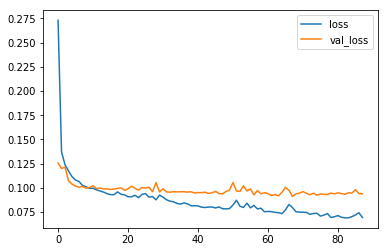

In [51]:
history_df.loc[:,['loss','val_loss']].plot();
print("Minimum validation loss : {}".format(history_df['val_loss'].min()))

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [4]:
spotify = pd.read_csv('spotify.csv')

In [5]:
spotify.drop(columns={'Unnamed: 0'}, inplace=True)

In [6]:
spotify.shape

(32833, 23)

In [7]:
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

In [8]:
feature_num = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms']
feature_cat = ['playlist_genre']

In [9]:
preprocessor = make_column_transformer(
            (StandardScaler(),feature_num),
            (OneHotEncoder(),feature_cat),
)

In [10]:
def group_split(X,y,group,train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X,y,groups=group))
    return (X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test])


In [11]:
X_train, X_valid, y_train, y_valid = group_split(X,y,artists)

In [12]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.fit_transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

In [13]:
input_shape = [X_train.shape[1]]

In [14]:
input_shape

[18]

In [15]:
model = keras.Sequential([
        layers.Dense(1, input_shape=input_shape),
]
)
model.compile(optimizer='adam', loss='mae')

history = model.fit(
                X_train, y_train,
                validation_data = (X_valid,y_valid),
                batch_size = 512,
                epochs = 50,
                verbose=0,

)

history_df = pd.DataFrame(history.history)
